In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

%matplotlib inline

In [47]:
codedir = '/'.join(os.getcwd().split("/")[:-1])
pipe_res = os.path.join(codedir,"pipe")
chan_res = os.path.join(codedir,"channel")
bl_res   = os.path.join(codedir,"bl")
turbmodels = ['SA','VF','SST','MK']

In [116]:
dfs_pipe = [ pd.read_fwf(os.path.join(pipe_res,'Inflow_'+t+'_00360.csv')) for t in turbmodels]
dfs_chan = [ pd.read_fwf(os.path.join(chan_res,'Inflow_'+t+'_00360.csv')) for t in turbmodels]
dfs_bl   = [ pd.read_fwf(os.path.join(bl_res  ,'Inflow_'+t+'_00360.csv')) for t in turbmodels]

In [139]:
#parabolic
y = np.logspace(-0.5,1.2,100)
df_vis = pd.DataFrame(np.array([y,y]).T, columns=['yp','w'])
#log law
y2 = np.logspace(-.1,2.3,100)
kappa = 0.40
w2 = (1/kappa)*np.log(y2) +6
df_log = pd.DataFrame(np.array([y2,w2]).T, columns=['yp','w'])


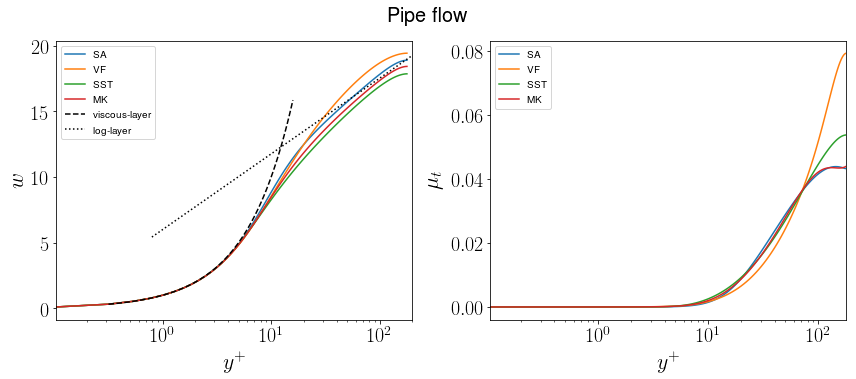

In [140]:
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(12,5.5))
for i,df in enumerate(dfs_pipe):
    df.plot('yp','w',ax=ax1, label=turbmodels[i])
    df.plot('yp','mut',ax=ax2, label=turbmodels[i])
df_vis.plot('yp','w',ax=ax1,linestyle='--',color='k',label='viscous-layer')    
df_log.plot('yp','w',ax=ax1,linestyle=':' ,color='k',label='log-layer')


ax1.set_xlabel("$\displaystyle y^+$",  fontsize=22)
ax1.set_ylabel("$\displaystyle w$",  fontsize=22)
ax1.tick_params(labelsize=20)
ax1.set_xscale("log")
ax2.set_xlabel("$\displaystyle y^+$",  fontsize=22)
ax2.set_ylabel("$\displaystyle \mu_t$",fontsize=22)
ax2.tick_params(labelsize=20)
ax2.set_xscale("log")
fig.tight_layout(rect=[0.,0.,1.0, 0.9]), 
fig.suptitle('Pipe flow', y=0.95, fontsize=20)
fig.savefig("pipe.png")

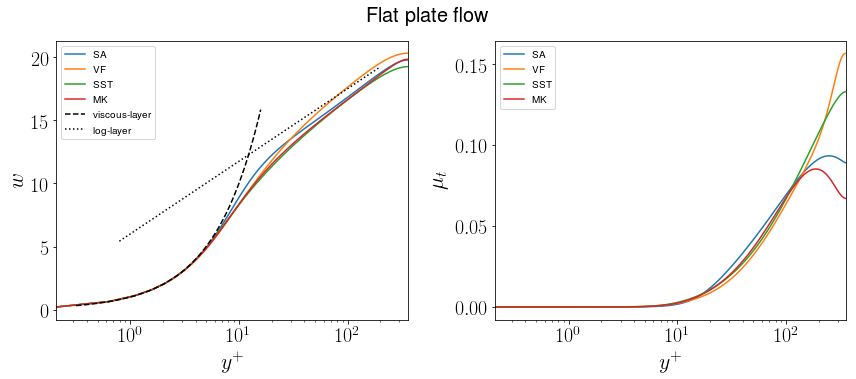

In [144]:
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(12,5.5))
for i,df in enumerate(dfs_bl):
    df.plot('yp','w',ax=ax1, label=turbmodels[i])
    df.plot('yp','mut',ax=ax2, label=turbmodels[i])
df_vis.plot('yp','w',ax=ax1,linestyle='--',color='k',label='viscous-layer')    
df_log.plot('yp','w',ax=ax1,linestyle=':' ,color='k',label='log-layer')
ax1.set_xlabel("$\displaystyle y^+$",  fontsize=22)
ax1.set_ylabel("$\displaystyle w$",  fontsize=22)
ax1.tick_params(labelsize=20)
ax1.set_xscale("log")
ax2.set_xlabel("$\displaystyle y^+$",  fontsize=22)
ax2.set_ylabel("$\displaystyle \mu_t$",fontsize=22)
ax2.tick_params(labelsize=20)
ax2.set_xscale("log")
fig.tight_layout(rect=[0.,0.,1.0, 0.9]), 
fig.suptitle('Flat plate flow', y=0.95, fontsize=20)
fig.savefig("bl.png")

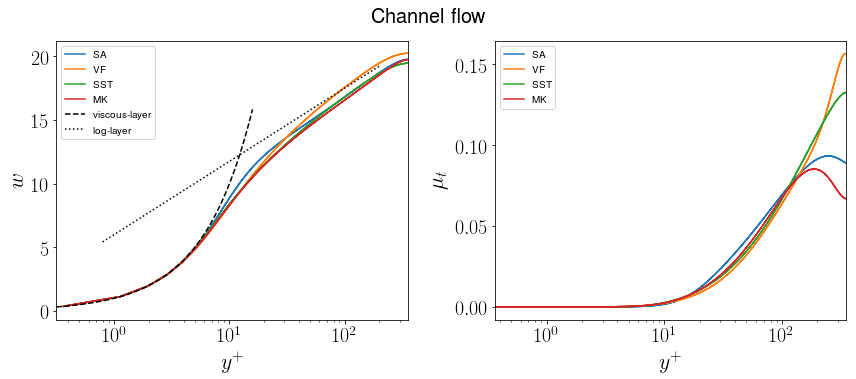

In [143]:
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(12,5.5))
for i,df in enumerate(dfs_chan):
    df.plot('yp','w',ax=ax1, label=turbmodels[i])
    df.plot('yp','mut',ax=ax2, label=turbmodels[i])
df_vis.plot('yp','w',ax=ax1,linestyle='--',color='k',label='viscous-layer')    
df_log.plot('yp','w',ax=ax1,linestyle=':' ,color='k',label='log-layer')
ax1.set_xlabel("$\displaystyle y^+$",  fontsize=22)
ax1.set_ylabel("$\displaystyle w$",  fontsize=22)
ax1.tick_params(labelsize=20)
ax1.set_xscale("log")
ax2.set_xlabel("$\displaystyle y^+$",  fontsize=22)
ax2.set_ylabel("$\displaystyle \mu_t$",fontsize=22)
ax2.tick_params(labelsize=20)
ax2.set_xscale("log")
fig.tight_layout(rect=[0.,0.,1.0, 0.9]), 
fig.suptitle('Channel flow', y=0.95, fontsize=20)
fig.savefig("channel.png")